# 경사하강법(Gradient Descent) 시각화

이 노트북에서는 최적화 알고리즘 중 가장 기본적인 경사하강법을 시각화하여 이해해보겠습니다.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import animation
from IPython.display import HTML

plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.figsize'] = [10, 8]

# MAE vs MSE

---
| 항목               | 결과                        | 해석                                    |
|--------------------|-----------------------------|-------------------------------------------|
| MAE 최소 지점      | \( a = \text{median}(y) = 4 \)   | MAE는 중앙값에서 최소화됨               |
| MSE 최소 지점      | \( a = \text{mean}(y) = 5.2 \)    | MSE는 평균에서 최소화됨                 |
| 곡선 형태          | MAE: V자형 / MSE: 포물선 형태     | MAE는 선형 증가, MSE는 제곱 증가         |
| 이상치(12)의 영향 | MAE: 거의 없음 / MSE: 민감하게 반응 | MSE는 평균값을 오른쪽으로 당겨버림      |

---

#### 🔹 MAE는 중앙값을 최소화한다
- 이유: 절댓값 오차 합은 **중앙값에서 균형**
- $ \arg\min_a \sum |y_i - a| = \text{median}(y) $

#### 🔹 MSE는 평균을 최소화한다
- 이유: 제곱 오차 합은 **평균에서 최소**
- $ \arg\min_a \sum (y_i - a)^2 = \text{mean}(y) $

#### 🔹 손실 함수 선택 = 어떤 통계량을 추정할지 결정하는 것
- MAE → **중앙값**
- MSE → **평균**




Mean: 5.2
Median: 4.0


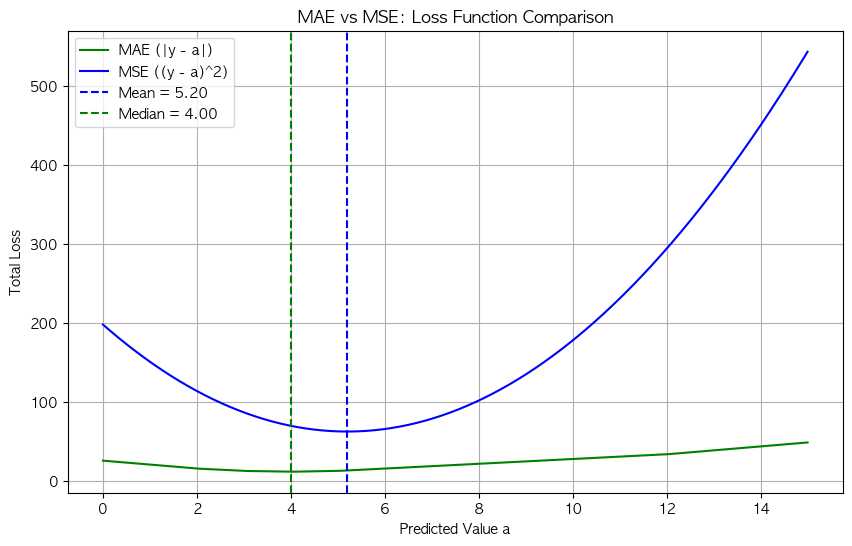

In [22]:
# Less extreme example data
y = np.array([2, 3, 4, 5, 12])  # Using 12 instead of 100
n = len(y)

# Mean and median
mean_y = np.mean(y)
median_y = np.median(y)
print("Mean:", mean_y)
print("Median:", median_y)

def mae_loss(a, y):
    return np.sum(np.abs(y - a))

def mse_loss(a, y):
    return np.sum((y - a)**2)

# Adjusting the range of predicted values
a_vals = np.linspace(0, 15, 500)  # Using 15 instead of 100
mae_vals = [mae_loss(a, y) for a in a_vals]
mse_vals = [mse_loss(a, y) for a in a_vals]

plt.figure(figsize=(10, 6))
plt.plot(a_vals, mae_vals, label='MAE (|y - a|)', color='green')
plt.plot(a_vals, mse_vals, label='MSE ((y - a)^2)', color='blue')
plt.axvline(mean_y, color='blue', linestyle='--', label=f'Mean = {mean_y:.2f}')
plt.axvline(median_y, color='green', linestyle='--', label=f'Median = {median_y:.2f}')
plt.title("MAE vs MSE: Loss Function Comparison")
plt.xlabel("Predicted Value a")
plt.ylabel("Total Loss")
plt.legend()
plt.grid(True)
plt.show()

## 1. 간단한 2차원 함수 정의

먼저 최적화할 간단한 2차원 함수를 정의하겠습니다. 여기서는 2차원 이차함수를 사용하겠습니다.

In [2]:
def quadratic_function(x, y):
    return x**2 + y**2

def gradient_quadratic(x, y):
    return np.array([2*x, 2*y])

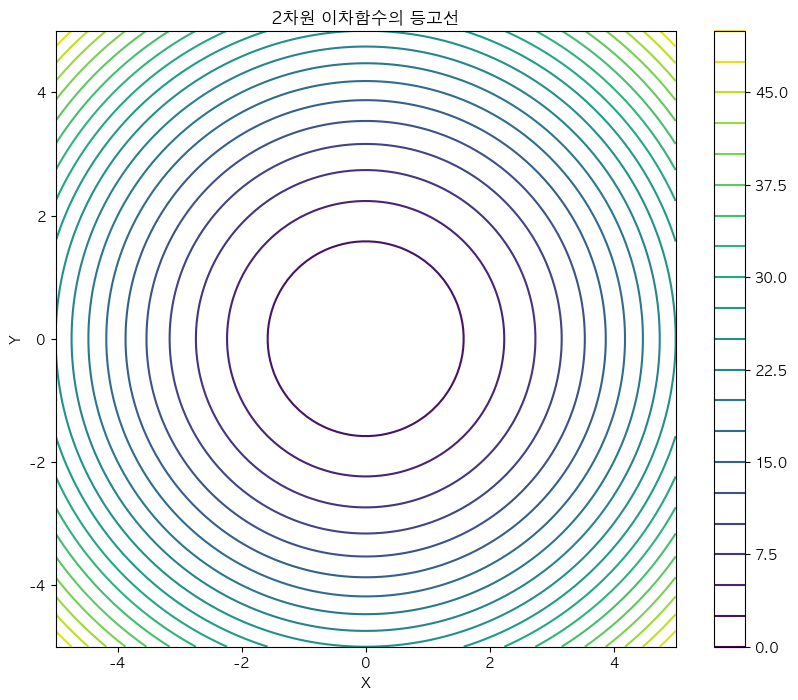

In [5]:
# 2. 등고선 시각화를 위한 데이터 생성
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = quadratic_function(X, Y)

# 3. 등고선 플롯 생성
plt.figure(figsize=(10, 8))
contour = plt.contour(X, Y, Z, levels=20, cmap='viridis')
plt.colorbar(contour)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('2차원 이차함수의 등고선')
plt.show()

## 2. 함수의 3D 시각화

함수의 모양을 3D로 시각화해보겠습니다.

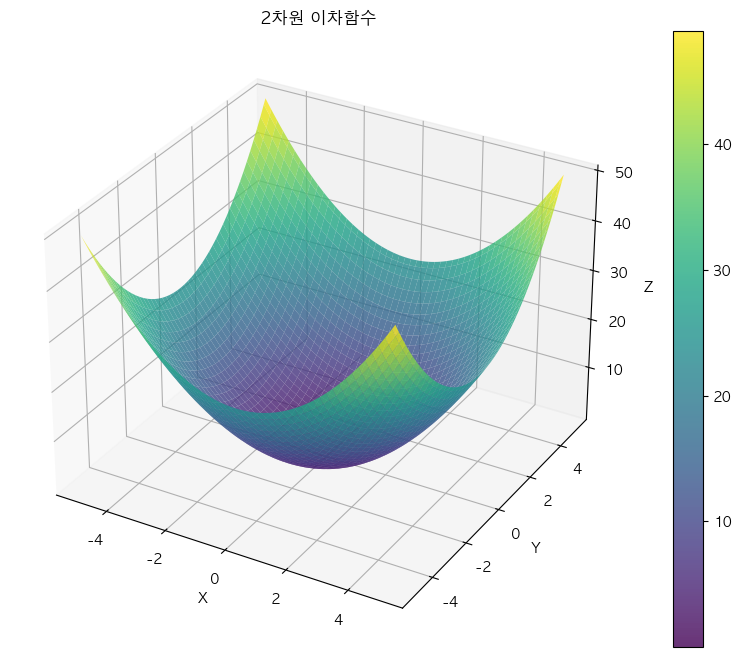

In [3]:
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = quadratic_function(X, Y)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('2차원 이차함수')
plt.colorbar(surf)
plt.show()

## 3. 경사하강법 구현

이제 경사하강법을 구현하고, 최적화 과정을 시각화해보겠습니다.

In [4]:
def gradient_descent(start_point, learning_rate, num_iterations):
    points = [start_point]
    current_point = start_point
    
    for _ in range(num_iterations):
        grad = gradient_quadratic(current_point[0], current_point[1])
        current_point = current_point - learning_rate * grad
        points.append(current_point)
    
    return np.array(points)

## 4. 경사하강법 애니메이션

경사하강법의 진행 과정을 애니메이션으로 시각화해보겠습니다.

In [6]:
# 초기값과 학습률 설정
start_point = np.array([4.0, 4.0])
learning_rate = 0.1
num_iterations = 50

# 경사하강법 실행
points = gradient_descent(start_point, learning_rate, num_iterations)

# 애니메이션 생성
fig, ax = plt.subplots(figsize=(10, 8))
contour = ax.contourf(X, Y, Z, levels=20, cmap='viridis')
plt.colorbar(contour)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('경사하강법 진행 과정')

line, = ax.plot([], [], 'r-', lw=2)
point, = ax.plot([], [], 'ro')

def init():
    line.set_data([], [])
    point.set_data([], [])
    return line, point

def animate(i):
    line.set_data(points[:i+1, 0], points[:i+1, 1])
    point.set_data(points[i, 0], points[i, 1])
    return line, point

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=len(points), interval=200,
                               blit=True)

HTML(anim.to_html5_video())

NameError: name 'gradient_descent' is not defined

## 5. 학습률(Learning Rate)의 영향

학습률이 경사하강법의 수렴에 미치는 영향을 살펴보겠습니다.

In [ ]:
learning_rates = [0.01, 0.1, 0.5, 1.0]
num_iterations = 50

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

for i, lr in enumerate(learning_rates):
    points = gradient_descent(start_point, lr, num_iterations)
    
    ax = axes[i]
    contour = ax.contourf(X, Y, Z, levels=20, cmap='viridis')
    ax.plot(points[:, 0], points[:, 1], 'r-', lw=2)
    ax.plot(points[-1, 0], points[-1, 1], 'ro')
    ax.set_title(f'Learning Rate = {lr}')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')

plt.tight_layout()
plt.show()

## 6. 더 복잡한 함수: Rosenbrock 함수

이제 더 복잡한 Rosenbrock 함수에 대해 경사하강법을 적용해보겠습니다.

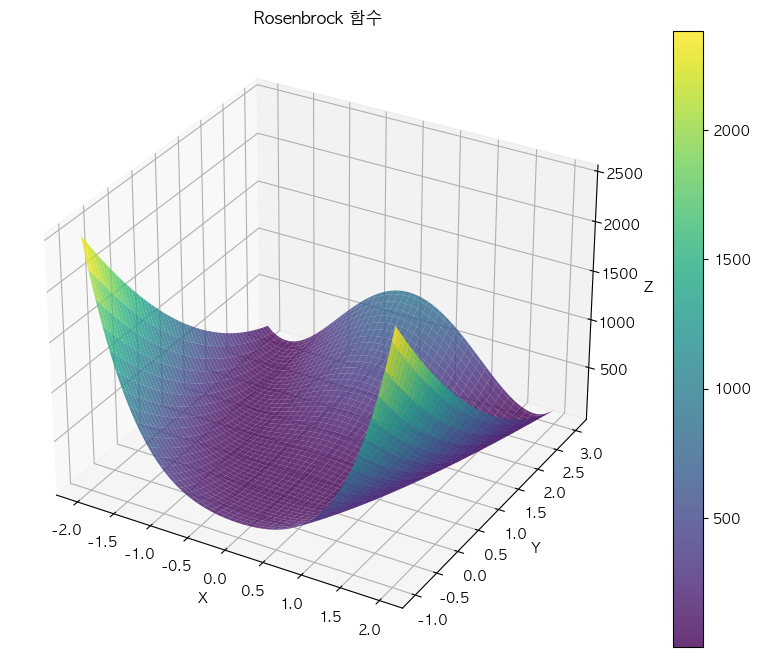

In [8]:
def rosenbrock(x, y):
    return (1 - x)**2 + 100 * (y - x**2)**2

def gradient_rosenbrock(x, y):
    dx = -2 * (1 - x) - 400 * x * (y - x**2)
    dy = 200 * (y - x**2)
    return np.array([dx, dy])

def gradient_descent_rosenbrock(start_point, learning_rate, num_iterations):
    points = [start_point]
    current_point = start_point
    
    for _ in range(num_iterations):
        grad = gradient_rosenbrock(current_point[0], current_point[1])
        current_point = current_point - learning_rate * grad
        points.append(current_point)
    
    return np.array(points)

# Rosenbrock 함수 시각화
x = np.linspace(-2, 2, 100)
y = np.linspace(-1, 3, 100)
X, Y = np.meshgrid(x, y)
Z = rosenbrock(X, Y)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Rosenbrock 함수')
plt.colorbar(surf)
plt.show()

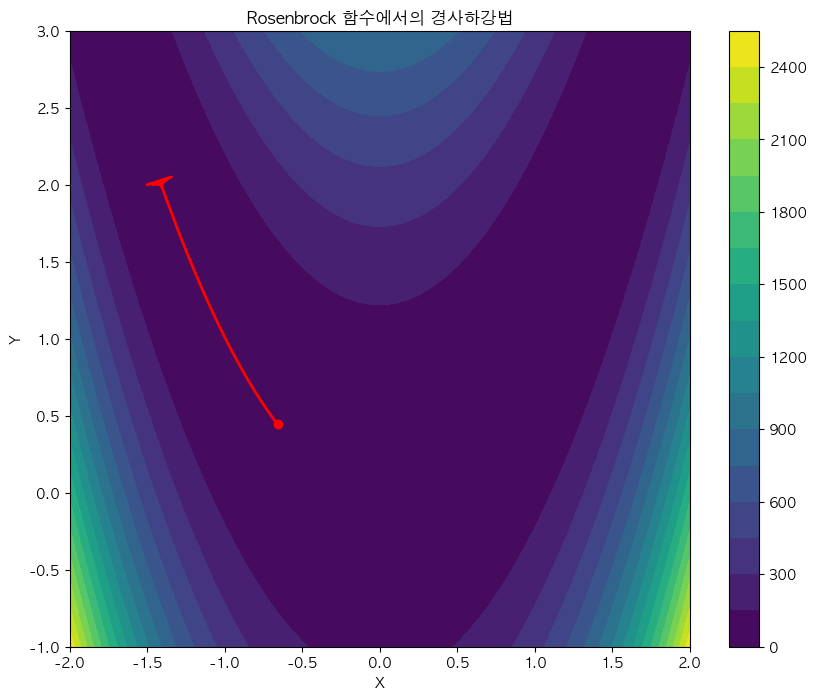

In [9]:
# Rosenbrock 함수에 대한 경사하강법
start_point = np.array([-1.5, 2.0])
learning_rate = 0.001
num_iterations = 1000

points = gradient_descent_rosenbrock(start_point, learning_rate, num_iterations)

fig, ax = plt.subplots(figsize=(10, 8))
contour = ax.contourf(X, Y, Z, levels=20, cmap='viridis')
plt.colorbar(contour)
ax.plot(points[:, 0], points[:, 1], 'r-', lw=2)
ax.plot(points[-1, 0], points[-1, 1], 'ro')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Rosenbrock 함수에서의 경사하강법')
plt.show()

## 7. 결론

이 노트북을 통해 우리는 다음과 같은 내용을 배웠습니다:

1. 경사하강법의 기본 원리
2. 학습률이 최적화 과정에 미치는 영향
3. 단순한 이차함수와 복잡한 Rosenbrock 함수에서의 경사하강법 동작
4. 최적화 과정의 시각화 방법

경사하강법은 머신러닝과 딥러닝에서 가장 기본적이고 중요한 최적화 알고리즘 중 하나입니다. 이 시각화를 통해 경사하강법이 어떻게 작동하는지 더 잘 이해할 수 있었을 것입니다.